In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from solutions.utils.constants import FRONTIER_COUNT, FRONTIER_FEATURES, ACTION_SPACE, OTHER_FRONTIER_INPUTS

In [6]:
Q = torch.load("data/Q_function_6.pth", map_location=torch.device('cpu'), weights_only=False)

In [7]:
keys = [
    'size',
    'count',
    'distance',
    'repulsion_angle',
    'direction_angle',
    'distance_last'
]
keys.sort()
keys

['count',
 'direction_angle',
 'distance',
 'distance_last',
 'repulsion_angle',
 'size']

In [20]:
def multi_input(x):
    output = torch.zeros(ACTION_SPACE,device=x.device, dtype=x.dtype)
    for i in range(ACTION_SPACE):
        input = torch.zeros(FRONTIER_FEATURES+OTHER_FRONTIER_INPUTS, device=x.device, dtype=x.dtype)
        for j in range(ACTION_SPACE):
            input[j] = x[j*FRONTIER_FEATURES+i]
        for j in range(OTHER_FRONTIER_INPUTS):
            input[FRONTIER_FEATURES+j] = x[ACTION_SPACE*FRONTIER_FEATURES+j]
        output[i] = Q(input)[0]
    return output

policy = multi_input

In [21]:
actions = np.zeros(6)
for _ in range(1000):
    obs = torch.tensor(np.random.random(39), dtype=torch.float32)
    obs[-3] = 0.5
    obs[-2] = 0.01
    obs[-1] = 0.2
    with torch.no_grad():
        out = policy(obs).cpu().numpy()
        actions[np.argmax(out)] += 1
print(actions)

[158. 180. 178. 150. 186. 148.]


In [24]:
reward = []
exp = []

for i in range(100): 
    e =  (i/100)
    exp.append(e)
    
    obs = torch.tensor(np.zeros(39), dtype=torch.float32)
    for i in range(FRONTIER_FEATURES):
        obs[FRONTIER_COUNT*i+0] = 1
    obs[-3] = e
    obs[-2] = 0.05
    obs[-1] = 0.3
    with torch.no_grad():
        out = policy(obs)
        reward.append(out.cpu().numpy())

reward = np.array(reward)
        

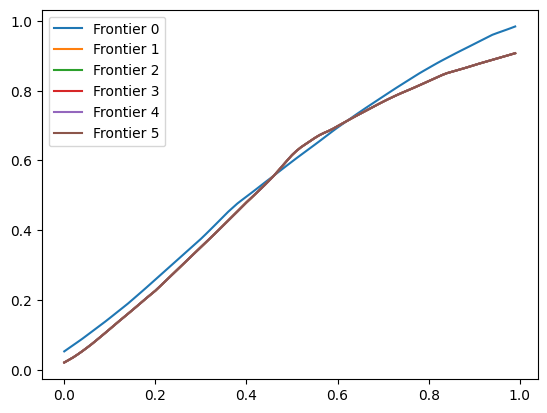

In [25]:
for i in range(FRONTIER_COUNT):
    plt.plot(exp,reward[:,i],label=f"Frontier {i}")
plt.legend()
plt.show()